In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_dir="E:\mulitfish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir="E:\mulitfish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
test_dir="E:\mulitfish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test"

In [9]:
image_height=224
image_width=224
batch_size=32

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)
# Test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"E:\mulitfish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train" ,          
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
# Load validation data
validation_generator = train_datagen.flow_from_directory(
    r"E:\mulitfish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)
# Load test data
test_generator = test_datagen.flow_from_directory(
    r"E:\mulitfish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4984 images belonging to 11 classes.
Found 215 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


animal fish: 877 images
animal fish bass: 24 images
fish sea_food black_sea_sprat: 456 images
fish sea_food gilt_head_bream: 453 images
fish sea_food hourse_mackerel: 459 images
fish sea_food red_mullet: 464 images
fish sea_food red_sea_bream: 457 images
fish sea_food sea_bass: 431 images
fish sea_food shrimp: 461 images
fish sea_food striped_red_mullet: 438 images
fish sea_food trout: 464 images


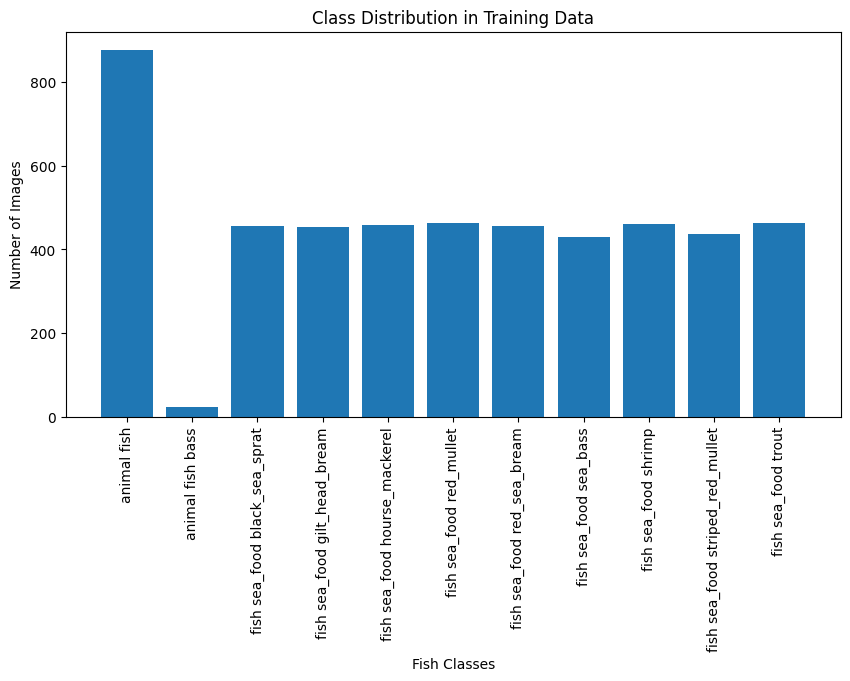

In [15]:
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

unique, counts = np.unique(class_counts, return_counts=True)
for label, count in zip(unique, counts):
    print(f"{class_labels[label]}: {count} images")

plt.figure(figsize=(10,5))
plt.bar(class_labels, counts)
plt.xticks(rotation=90)
plt.xlabel("Fish Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.show()

In [16]:
# Identify small classes (example threshold <50)
small_classes = [label for label, count in zip(unique, counts) if count < 50]
print("Small classes:", [class_labels[i] for i in small_classes])

Small classes: ['animal fish bass']


In [17]:
# Define Custom CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
#Model CNN 
epochs = 20

history = model.fit(
    train_generator,     
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,   
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs 
)

model.save('Custom CNN/custom_cnn_model.h5')
model.save('Custom CNN/custom_cnn_model.keras')

cnn_loss, cnn_acc = model.evaluate(validation_generator)
print(f"Custom CNN Accuracy: {cnn_acc*100:.2f}%")

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 857s 5s/step - accuracy: 0.2530 - loss: 5.8515 - val_accuracy: 0.1302 - val_loss: 24.9778
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.3750 - loss: 1.9481 - val_accuracy: 0.1250 - val_loss: 25.9785
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.2353 - loss: 2.4029 - val_accuracy: 0.1615 - val_loss: 17.9171
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.1562 - loss: 2.2009 - val_accuracy: 0.1719 - val_loss: 17.4062
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.2415 - loss: 2.1917 - val_accuracy: 0.2760 - val_loss: 2.7888
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.1562 - loss: 2.0523 - val_accuracy: 0.2708 - val_loss: 2.7980
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 576s 4s/step - accuracy: 0.2415 - loss: 2.0809 - val_accuracy: 0.2865 - val_loss: 3.2400
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.1562 - loss: 2.0196 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.2512 - loss: 3.8295
Custom CNN Accuracy: 25.12%


In [19]:
# Model VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False

model_vgg.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('VGG16_best.keras', monitor='val_accuracy', save_best_only=True)

history_vgg = model_vgg.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stop, checkpoint]
)

model_vgg.save('VGG16_final.h5')

model_vgg.save('VGG16_final.keras')

loss, acc = model_vgg.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 909s 6s/step - accuracy: 0.2468 - loss: 2.1441 - val_accuracy: 0.5349 - val_loss: 1.6261
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1376s 9s/step - accuracy: 0.5568 - loss: 1.3440 - val_accuracy: 0.7674 - val_loss: 0.9127
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3077s 20s/step - accuracy: 0.7079 - loss: 0.8837 - val_accuracy: 0.8279 - val_loss: 0.6320
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 976s 6s/step - accuracy: 0.8136 - loss: 0.6222 - val_accuracy: 0.9302 - val_loss: 0.4049
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 900s 6s/step - accuracy: 0.8567 - loss: 0.4721 - val_accuracy: 0.9395 - val_loss: 0.3204


7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.9442 - loss: 0.3282
Validation Accuracy: 94.42%


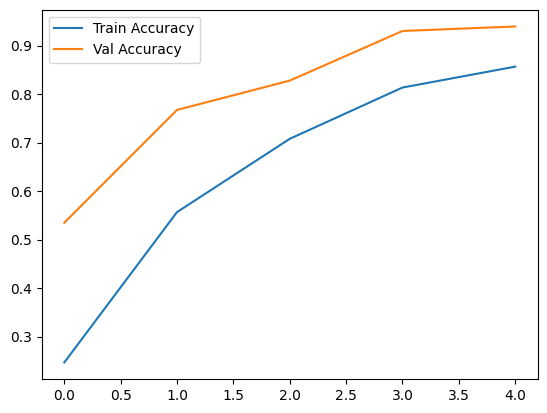

In [20]:
import matplotlib.pyplot as plt

plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [21]:
# Model ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

ResNet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = ResNet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=ResNet_base.input, outputs=output)

for layer in ResNet_base.layers[:-10]:
    layer.trainable = False

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('ResNet50_best.keras', monitor='val_accuracy', save_best_only=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)
loss, acc = model_resnet.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_resnet.save('ResNet50_final.keras')
model_resnet.save('ResNet50_final.h5')

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 446s 3s/step - accuracy: 0.1738 - loss: 2.3814 - val_accuracy: 0.1721 - val_loss: 2.3589
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 528s 3s/step - accuracy: 0.2366 - loss: 2.1461 - val_accuracy: 0.2047 - val_loss: 2.1780
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 552s 4s/step - accuracy: 0.2849 - loss: 2.0373 - val_accuracy: 0.3070 - val_loss: 2.0116
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 668s 4s/step - accuracy: 0.3178 - loss: 1.9578 - val_accuracy: 0.3349 - val_loss: 1.9300
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.3441 - loss: 1.8858 - val_accuracy: 0.4512 - val_loss: 1.8003
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 0.3672 - loss: 1.8421 - val_accuracy: 0.3674 - val_loss: 1.8421
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 0.3902 - loss: 1.7796 - val_accuracy: 0.4512 - val_loss: 1.7724
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.3967 - loss: 1.7427 - val_accu

In [22]:
# Model MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

MobileNet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = MobileNet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=MobileNet_base.input, outputs=output)

for layer in MobileNet_base.layers[:-8]:
    layer.trainable = False

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('MobileNet_best.keras', monitor='val_accuracy', save_best_only=True)

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_mobilenet.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_mobilenet.save('MobileNet_final.keras')
model_mobilenet.save('MobileNet_final.h5')

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.1972 - loss: 2.4929 - val_accuracy: 0.4372 - val_loss: 1.7212
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.4436 - loss: 1.6673 - val_accuracy: 0.7023 - val_loss: 1.1889
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5953 - loss: 1.2615 - val_accuracy: 0.8047 - val_loss: 0.9325
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.6818 - loss: 1.0207 - val_accuracy: 0.8186 - val_loss: 0.7364
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7530 - loss: 0.8245 - val_accuracy: 0.9116 - val_loss: 0.5676
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.7953 - loss: 0.7110 - val_accuracy: 0.8977 - val_loss: 0.4778
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8270 - loss: 0.6196 - val_accuracy: 0.9256 - val_loss: 0.4196
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8527 - loss: 0.5374 - val_accu

In [23]:
# Model InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = Inception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_inception = Model(inputs=Inception_base.input, outputs=output)

for layer in Inception_base.layers[:-20]:
    layer.trainable = False 

model_inception.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('InceptionV3_best.keras', monitor='val_accuracy', save_best_only=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_inception.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_inception.save('InceptionV3_final.keras')
model_inception.save('InceptionV3_final.h5')

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.3341 - loss: 2.0072 - val_accuracy: 0.6884 - val_loss: 1.4911
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.6641 - loss: 1.2780 - val_accuracy: 0.8651 - val_loss: 0.8851
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7673 - loss: 0.9236 - val_accuracy: 0.8884 - val_loss: 0.6700
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.8214 - loss: 0.7155 - val_accuracy: 0.9023 - val_loss: 0.5242
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.8527 - loss: 0.5802 - val_accuracy: 0.9070 - val_loss: 0.4440
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.8680 - loss: 0.5077 - val_accuracy: 0.9302 - val_loss: 0.3648
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.8902 - loss: 0.4329 - val_accuracy: 0.9302 - val_loss: 0.3523
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.8921 - loss: 0.3948 - val_accu

In [24]:
# Model EfficientNetV2B0
import scipy
from tensorflow.keras.applications import EfficientNetV2B0 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

effnet_v2_base = EfficientNetV2B0(
    weights='imagenet',       
    include_top=False,        
    input_shape=(224, 224, 3) 
)

x = effnet_v2_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_effnet_v2 = Model(inputs=effnet_v2_base.input, outputs=output)

for layer in effnet_v2_base.layers[:-20]:
    layer.trainable = False

model_effnet_v2.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('EfficientNetV2B0_best.keras', monitor='val_accuracy', save_best_only=True)

history_effnet_v2 = model_effnet_v2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)
loss, acc = model_effnet_v2.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_effnet_v2.save('EfficientNetV2B0_final.keras')
model_effnet_v2.save('EfficientNetV2B0_final.h5')


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.1049 - loss: 2.4227 - val_accuracy: 0.1721 - val_loss: 2.3543
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.1394 - loss: 2.3715 - val_accuracy: 0.1721 - val_loss: 2.3300
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.1527 - loss: 2.3519 - val_accuracy: 0.1721 - val_loss: 2.3190
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.1501 - loss: 2.3501 - val_accuracy: 0.1721 - val_loss: 2.3119
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.1627 - loss: 2.3366 - val_accuracy: 0.1721 - val_loss: 2.3091
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.1625 - loss: 2.3370 - val_accuracy: 0.1721 - val_loss: 2.3066
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.1623 - loss: 2.3259 - val_accuracy: 0.1721 - val_loss: 2.3009
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 263s 2

In [25]:
from tensorflow.keras.models import load_model

model = load_model("Custom CNN/custom_cnn_model.keras")                
model_vgg = load_model("VGG16_final.keras")                            
model_resnet = load_model("ResNet50_final.keras")                      
model_mobilenet = load_model("MobileNet_final.keras")                  
model_inception = load_model("InceptionV3_final.keras")                
model_effnet_v2 = load_model("EfficientNetV2B0_final.keras")           

cnn_loss, cnn_accuracy = model.evaluate(test_generator)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

vgg_loss, vgg_accuracy = model_vgg.evaluate(test_generator)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

resnet_loss, resnet_accuracy = model_resnet.evaluate(test_generator)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_generator)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

inception_loss, inception_accuracy = model_inception.evaluate(test_generator)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

efficient_loss, efficient_accuracy = model_effnet_v2.evaluate(test_generator)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 707ms/step - accuracy: 0.2300 - loss: 3.6489
Custom CNN Accuracy: 0.2300
100/100 ━━━━━━━━━━━━━━━━━━━━ 467s 5s/step - accuracy: 0.9683 - loss: 0.2008
VGG16 Accuracy: 0.9683
100/100 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.4804 - loss: 1.4922
ResNet50 Accuracy: 0.4804
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 741ms/step - accuracy: 0.9677 - loss: 0.1788
MobileNet Accuracy: 0.9677
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9743 - loss: 0.1588
InceptionV3 Accuracy: 0.9743
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 778ms/step - accuracy: 0.1632 - loss: 2.2956
EfficientNetB0 Accuracy: 0.1632


In [26]:
from sklearn.metrics import classification_report
import numpy as np

In [27]:
test_generator.reset()
cnn_prob = model.predict(test_generator, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("*** Custom CNN ***")
print(classification_report(test_generator.classes, cnn_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*** Custom CNN ***
                                  precision    recall  f1-score   support

                     animal fish     0.4711    0.9865    0.6377       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0638    0.0623    0.0630       305
   fish sea_food hourse_mackerel     0.1051    0.6294    0.1802       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0556    0.0031    0.0058       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.4167    0.0685    0.1176       292

                        accuracy                         0.2300      3187
                 

In [28]:
# VGG16
test_generator.reset()
vgg_prob = model_vgg.predict(test_generator, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("*****VGG16 ****")
print(classification_report(test_generator.classes, vgg_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*****VGG16 ****
                                  precision    recall  f1-score   support

                     animal fish     0.9754    0.9923    0.9838       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9863    0.9664    0.9763       298
   fish sea_food gilt_head_bream     0.9385    1.0000    0.9683       305
   fish sea_food hourse_mackerel     0.9823    0.9720    0.9772       286
        fish sea_food red_mullet     0.9512    0.9381    0.9446       291
     fish sea_food red_sea_bream     1.0000    0.9634    0.9813       273
          fish sea_food sea_bass     1.0000    0.9633    0.9813       327
            fish sea_food shrimp     0.9795    0.9931    0.9863       289
fish sea_food striped_red_mullet     0.8758    0.9386    0.9061       293
             fish sea_food trout     1.0000    0.9795    0.9896       292

                        accuracy                         0.9683      3187
                    

In [29]:
# ResNet50
test_generator.reset()
resnet_prob = model_resnet.predict(test_generator, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("*** ResNet50 ***")
print(classification_report(test_generator.classes, resnet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*** ResNet50 ***
                                  precision    recall  f1-score   support

                     animal fish     0.9377    0.5788    0.7158       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.8923    0.1946    0.3196       298
   fish sea_food gilt_head_bream     0.3772    0.2066    0.2669       305
   fish sea_food hourse_mackerel     0.4579    0.5140    0.4843       286
        fish sea_food red_mullet     0.5041    0.2131    0.2995       291
     fish sea_food red_sea_bream     0.3035    0.9084    0.4550       273
          fish sea_food sea_bass     0.3589    0.5719    0.4410       327
            fish sea_food shrimp     0.7466    0.5709    0.6471       289
fish sea_food striped_red_mullet     0.6341    0.1775    0.2773       293
             fish sea_food trout     0.4517    0.8493    0.5898       292

                        accuracy                         0.4804      3187
                   

In [30]:
# MobileNet
test_generator.reset()
mobilenet_prob = model_mobilenet.predict(test_generator, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("*** MobileNet ***")
print(classification_report(test_generator.classes, mobilenet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

*** MobileNet ***
                                  precision    recall  f1-score   support

                     animal fish     0.9752    0.9846    0.9799       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9669    0.9799    0.9733       298
   fish sea_food gilt_head_bream     0.9742    0.9902    0.9821       305
   fish sea_food hourse_mackerel     0.9722    0.9790    0.9756       286
        fish sea_food red_mullet     0.8697    0.9863    0.9243       291
     fish sea_food red_sea_bream     0.9927    0.9927    0.9927       273
          fish sea_food sea_bass     0.9907    0.9725    0.9815       327
            fish sea_food shrimp     0.9764    1.0000    0.9880       289
fish sea_food striped_red_mullet     0.9759    0.8294    0.8967       293
             fish sea_food trout     0.9898    0.9932    0.9915       292

                        accuracy                         0.9677      3187
                  

In [31]:
# InceptionV3
test_generator.reset()
inception_prob = model_inception.predict(test_generator, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_generator.classes, inception_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9700    0.9942    0.9820       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9898    0.9799    0.9848       298
   fish sea_food gilt_head_bream     0.9836    0.9836    0.9836       305
   fish sea_food hourse_mackerel     0.9527    0.9860    0.9691       286
        fish sea_food red_mullet     0.9555    0.9588    0.9571       291
     fish sea_food red_sea_bream     1.0000    0.9853    0.9926       273
          fish sea_food sea_bass     0.9640    0.9817    0.9727       327
            fish sea_food shrimp     1.0000    0.9931    0.9965       289
fish sea_food striped_red_mullet     0.9502    0.9113    0.9303       293
             fish sea_food trout     0.9831    0.9966    0.9898       292

                        accuracy                         0.9743      3187
                

In [32]:
# EfficientNetB0
test_generator.reset()
efficient_prob = model_effnet_v2.predict(test_generator, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("**** EfficientNetB0 ****")
print(classification_report(test_generator.classes, efficient_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

**** EfficientNetB0 ****
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
           

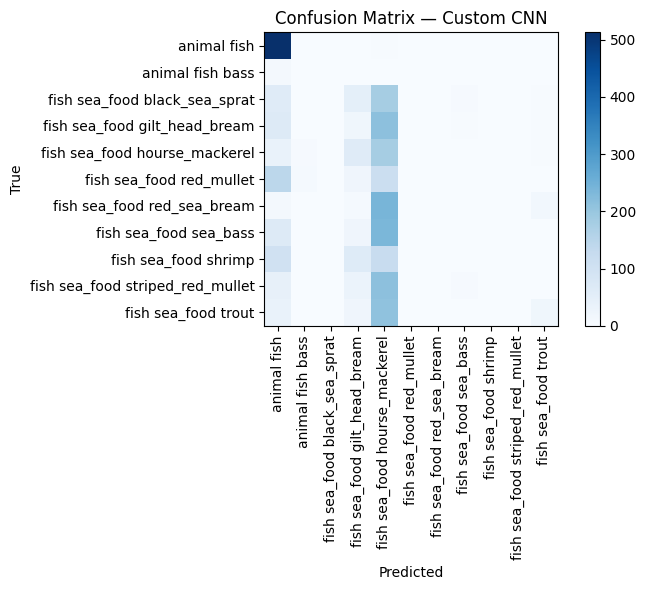

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

class_names = list(test_generator.class_indices.keys())
y_true = test_generator.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

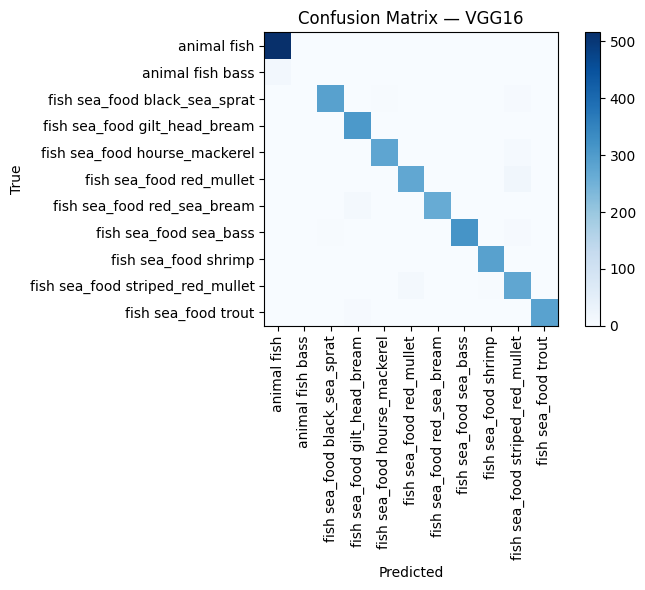

In [34]:
# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

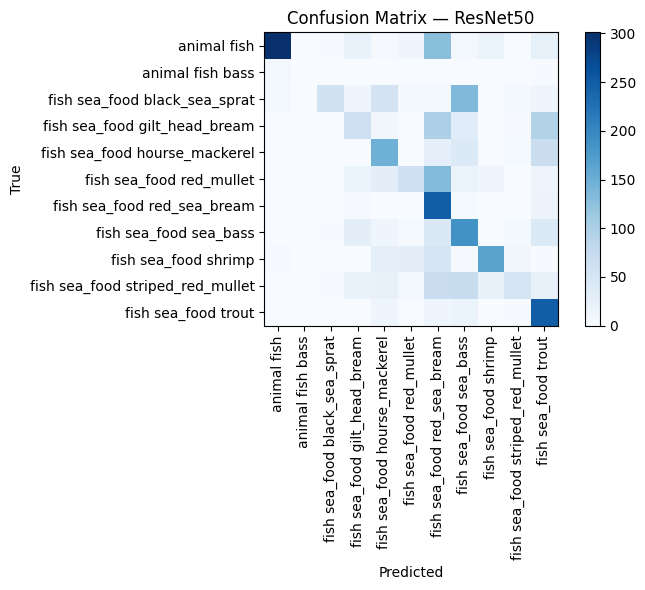

In [35]:
# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

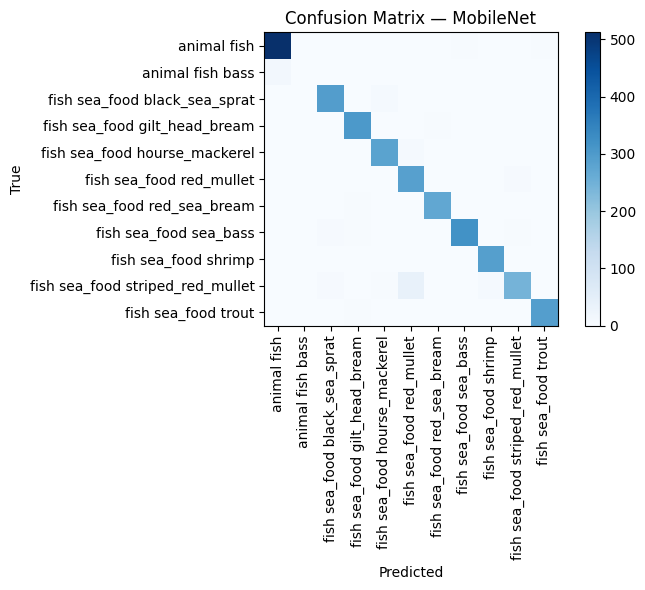

In [36]:
# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

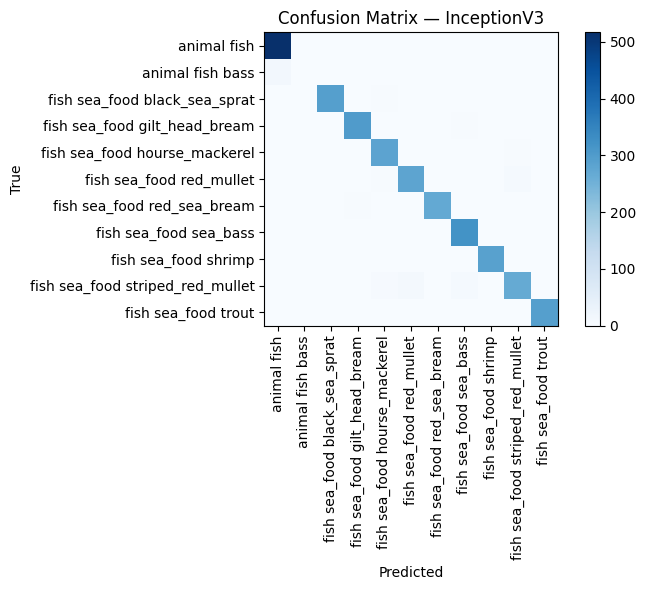

In [37]:
# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

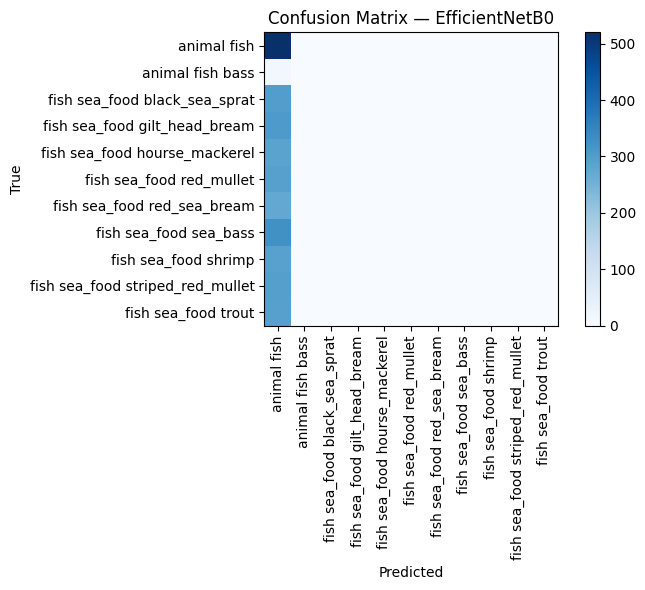

In [38]:
# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")